## Импорты

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [110]:
import sklearn

# метрики
from sklearn.metrics import precision_score

# выбросы
from sklearn.neighbors import LocalOutlierFactor

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.mixture import BayesianGaussianMixture
from sklearn.inspection import permutation_importance

# encoder
from sklearn.preprocessing import LabelEncoder

# масштабирование
from sklearn.preprocessing import StandardScaler
# размерность
from sklearn.decomposition import PCA

# data split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# модели
# регрессия
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# классификация
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import SGDClassifier, SGDOneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import ElasticNet

from vecstack import stacking
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier

# полимональность
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# скоры
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

## Первый взгляд на датасет

In [330]:
df = pd.read_csv("data/test.csv", on_bad_lines='skip', delimiter=';')

In [109]:
df

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,2020-05-01,Город,Москва,Москва,8611aa7a7ffffff,55.729458,37.516569,0.00101,0.00103,...,0.13027,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01737,0.0
1,1,2020-05-01,Город,Москва,Москва,8611aa01fffffff,55.975851,37.237085,0.00000,0.00027,...,0.08756,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01152,0.0
2,1,2020-05-01,Город,Москва,Москва,861181b6fffffff,55.622721,37.695121,0.00339,0.00313,...,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,2020-05-01,Город,Москва,Москва,8611aa017ffffff,55.941586,37.157487,0.00048,0.00054,...,0.10192,0.00000,0.00049,NaN,NaN,NaN,NaN,NaN,0.01495,0.0
4,1,2020-05-01,Город,Москва,Москва,8611aa637ffffff,55.797494,37.676200,0.00164,0.00179,...,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,2020-12-01,Край,Хабаровский,Рощино,8614d6497ffffff,48.364768,134.996232,0.00111,0.00100,...,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,2020-12-01,Край,Приморский,Шкотово,86316c8cfffffff,43.309803,132.345989,0.00075,0.00065,...,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,2020-12-01,Край,Приморский,Партизанск,862ecdb2fffffff,43.057826,133.155582,0.00018,0.00014,...,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,2020-12-01,Край,Камчатский,Вилючинск,861616747ffffff,52.908685,158.406443,0.00075,0.00138,...,0.31990,0.08768,0.00000,NaN,NaN,NaN,NaN,NaN,0.06398,0.0


In [111]:
df.columns

Index(['label', 'period', 'subject_type', 'subject_name', 'city_name', 'hex',
       'hex_lat', 'hex_lon', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18',
       'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28',
       'f29', 'f30'],
      dtype='object')

In [112]:
# print(f"Процент Null значений: \n {df.isnull().sum() / df.shape[0]} \n")
print(f"Процент NA значений: \n{df.isna().sum() / df.shape[0]}")

Процент NA значений: 
label           0.000000
period          0.000000
subject_type    0.000000
subject_name    0.000000
city_name       0.000037
hex             0.000000
hex_lat         0.000000
hex_lon         0.000000
f1              0.122729
f2              0.106464
f3              0.096759
f4              0.049936
f5              0.049936
f6              0.041712
f7              0.494223
f8              0.047744
f9              0.047744
f10             0.000000
f11             0.000000
f12             0.000000
f13             0.432970
f14             0.025964
f15             0.058105
f16             0.477591
f17             0.494223
f18             0.000455
f19             0.025009
f20             0.025009
f21             0.025009
f22             0.025009
f23             0.025009
f24             0.430860
f25             0.430860
f26             0.430860
f27             0.430860
f28             0.430860
f29             0.025009
f30             0.025009
dtype: float64


In [114]:
df_dropped = df

In [115]:
df_dropped = df_dropped.dropna()

In [116]:
df_dropped = df_dropped.reset_index()

In [120]:
# распределение по городам
df_dropped[df_dropped["label"] == 1]["city_name"].value_counts()

Мурманск           328
Москва             254
Санкт-Петербург    203
Новосибирск        105
Воркута             99
                  ... 
Шатки                1
Хохряки              1
Каменки              1
Кулебаки             1
Усун-Кюель           1
Name: city_name, Length: 972, dtype: int64

In [132]:
df_dropped["period"].unique()

array(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype=object)

In [130]:
df_dropped[df_dropped["city_name"] == "Москва"]["period"].unique()

array(['2020-05-01', '2020-06-01'], dtype=object)

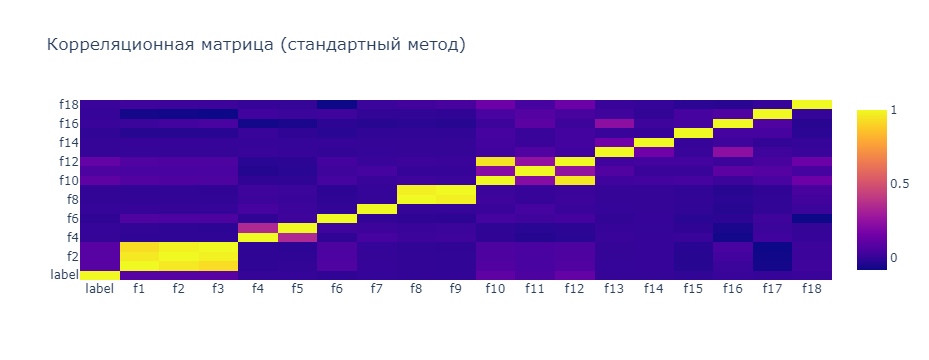

In [63]:
# корреляционная матрица

list_of_columns = ["label"] + [f"f{i}" for i in range(1, 19) if f"f{i}" in df_dropped.columns]
correlation_list = df_dropped[list_of_columns].corr()
# correlation_list = df.corr(method = "spearman")
# correlation_list = df.corr(method = "kendall")


fig = go.Figure(data = go.Heatmap(z = correlation_list,
                                  x = list_of_columns,
                                  y = list_of_columns,
                                  hoverongaps = True))

fig.update_layout(title = "Корреляционная матрица (стандартный метод)")

fig.show()

In [71]:
df_dropped["f13"].value_counts()

0.00000    131658
0.04762       184
0.09524         6
0.14286         1
Name: f13, dtype: int64

In [56]:
df_dropped = df_dropped[list_of_columns]

In [73]:
# Важность признаков

independent_columns = df_dropped.iloc[:, 1:]
target_column = df_dropped.iloc[:, 0]

best_features_model = ExtraTreesClassifier()
best_features_model.fit(independent_columns, target_column)

df_scores = pd.DataFrame(best_features_model.feature_importances_)
df_columns = pd.DataFrame(independent_columns.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(10, 'Score'))

   Feature     Score
11     f12  0.101531
9      f10  0.094075
2       f3  0.089409
10     f11  0.088137
0       f1  0.087843
5       f6  0.086838
16     f17  0.086835
17     f18  0.086293
1       f2  0.086217
14     f15  0.085030


## Первый очищенный датасет

In [154]:
df_train = pd.read_csv("data/train.csv", on_bad_lines='skip', delimiter=';')
df_test = pd.read_csv("data/test.csv", on_bad_lines='skip', delimiter=';')

In [155]:
# датасет не сбалансирован
df_train.shape[0] / df_train["label"].sum()

41.4097945398255

In [123]:
df_test.shape[0] / df_test["label"].sum()

47.472343070229954

In [17]:
df_train

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,2020-05-01,Город,Москва,Москва,8611aa7a7ffffff,55.729458,37.516569,0.00101,0.00103,...,0.13027,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01737,0.0
1,1,2020-05-01,Город,Москва,Москва,8611aa01fffffff,55.975851,37.237085,0.00000,0.00027,...,0.08756,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01152,0.0
2,1,2020-05-01,Город,Москва,Москва,861181b6fffffff,55.622721,37.695121,0.00339,0.00313,...,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,2020-05-01,Город,Москва,Москва,8611aa017ffffff,55.941586,37.157487,0.00048,0.00054,...,0.10192,0.00000,0.00049,NaN,NaN,NaN,NaN,NaN,0.01495,0.0
4,1,2020-05-01,Город,Москва,Москва,8611aa637ffffff,55.797494,37.676200,0.00164,0.00179,...,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,2020-12-01,Край,Хабаровский,Рощино,8614d6497ffffff,48.364768,134.996232,0.00111,0.00100,...,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,2020-12-01,Край,Приморский,Шкотово,86316c8cfffffff,43.309803,132.345989,0.00075,0.00065,...,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,2020-12-01,Край,Приморский,Партизанск,862ecdb2fffffff,43.057826,133.155582,0.00018,0.00014,...,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,2020-12-01,Край,Камчатский,Вилючинск,861616747ffffff,52.908685,158.406443,0.00075,0.00138,...,0.31990,0.08768,0.00000,NaN,NaN,NaN,NaN,NaN,0.06398,0.0


In [19]:
df_train = df_train.drop(["period", "hex", "hex_lat", "hex_lon"], axis=1)
df_test = df_test.drop(["period", "hex", "hex_lat", "hex_lon"], axis=1)

In [20]:
df_train

,label,subject_type,subject_name,city_name,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,Город,Москва,Москва,0.00101,0.00103,0.00195,0.0,0.0,0.41452,...,0.13027,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01737,0.0
1,1,Город,Москва,Москва,0.00000,0.00027,0.00053,0.0,0.0,0.41452,...,0.08756,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01152,0.0
2,1,Город,Москва,Москва,0.00339,0.00313,0.00439,0.0,0.0,0.41452,...,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,Город,Москва,Москва,0.00048,0.00054,0.00055,0.0,0.0,0.41452,...,0.10192,0.00000,0.00049,NaN,NaN,NaN,NaN,NaN,0.01495,0.0
4,1,Город,Москва,Москва,0.00164,0.00179,0.00219,0.0,0.0,0.41452,...,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,Край,Хабаровский,Рощино,0.00111,0.00100,0.00110,0.0,0.0,0.15391,...,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,Край,Приморский,Шкотово,0.00075,0.00065,0.00076,0.0,0.0,0.00643,...,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,Край,Приморский,Партизанск,0.00018,0.00014,0.00016,0.0,0.0,0.00140,...,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,Край,Камчатский,Вилючинск,0.00075,0.00138,0.00119,0.0,0.0,0.08380,...,0.31990,0.08768,0.00000,NaN,NaN,NaN,NaN,NaN,0.06398,0.0


Убираем столбцы в которых слишком много пропущенных значений

In [22]:
na_percentage = ((df_train.isna().sum() / df_train.shape[0]) < .05)

In [23]:
good_columns = [col for col in df_train.columns if na_percentage[col]]

In [24]:
df_train = df_train[good_columns]
df_test = df_test[good_columns]

In [25]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [26]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
df_test

,label,subject_type,subject_name,city_name,f4,f5,f6,f8,f9,f10,...,f12,f14,f18,f19,f20,f21,f22,f23,f29,f30
0,1,Город,Москва,Москва,0.00000,0.0,0.41867,0.0,0.0,0.12608,...,0.14823,0.0,0.01162,0.25940,0.03319,0.13385,0.00000,0.00055,0.00498,0.00000
1,1,Город,Москва,Москва,0.00000,0.0,0.01098,0.0,0.0,0.12576,...,0.14740,0.0,0.00667,0.26500,0.04000,0.14833,0.00000,0.00000,0.00333,0.00000
2,1,Город,Москва,Москва,0.00000,0.0,0.01727,0.0,0.0,0.12601,...,0.14865,0.0,0.00723,0.30561,0.01628,0.13562,0.00000,0.00000,0.00904,0.00000
3,1,Город,Москва,Москва,0.00000,0.0,0.02330,0.0,0.0,0.12628,...,0.14791,0.0,0.02078,0.36874,0.03541,0.15629,0.00000,0.00122,0.00977,0.00122
4,1,Город,Москва,Москва,0.00000,0.0,0.01028,0.0,0.0,0.12677,...,0.14839,0.0,0.01975,0.19506,0.03333,0.13333,0.00000,0.00000,0.00617,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141247,0,Республика,Саха /Якутия/,Якутск,0.00575,0.0,0.42345,0.0,0.0,0.12748,...,0.14908,0.0,0.05436,0.73908,0.03496,0.32272,0.34332,0.00000,0.05431,0.00000
141248,0,Область,Магаданская,Магадан,0.00000,0.0,0.01454,0.0,0.0,0.13142,...,0.15392,0.0,0.07615,0.64309,0.06094,0.31338,0.12514,0.00000,0.05550,0.00218
141249,0,Край,Камчатский,Петропавловск-Камчатский,0.00000,0.0,0.01910,0.0,0.0,0.13208,...,0.15409,0.0,0.04498,0.78283,0.12626,0.29167,0.10354,0.00000,0.08333,0.00252
141250,0,Республика,Саха /Якутия/,Якутск,0.00000,0.0,0.01249,0.0,0.0,0.13120,...,0.15271,0.0,0.05288,0.74339,0.06490,0.31250,0.27885,0.00000,0.06130,0.00060


In [28]:
df_test.to_csv("data/clear_original_test_v1.csv", index=False)
df_train.to_csv("data/clear_original_train_v1.csv", index=False)


## Датасет валют

In [19]:
df = pd.read_csv("data/kurs.csv", sep=';')

In [20]:
# df = df[(df["digital_code"] == 840) | ((df["digital_code"] == 978))]
df = df[(df["digital_code"] == 840)]

In [21]:
df

,date,currency,digital_code,letter_code,rate
0,1924-01-01,Доллар США,840.0,USD,2.2000
3,1924-02-01,Доллар США,840.0,USD,2.1700
6,1924-03-01,Доллар США,840.0,USD,2.1100
9,1924-03-08,Доллар США,840.0,USD,2.0000
13,1924-04-01,Доллар США,840.0,USD,1.9405
...,...,...,...,...,...
321358,2021-10-28,Доллар США,840.0,USD,69.8104
321392,2021-10-29,Доллар США,840.0,USD,70.5207
321426,2021-10-30,Доллар США,840.0,USD,70.5200
321460,2021-10-31,Доллар США,840.0,USD,70.5200


In [22]:
df["date"] = pd.to_datetime(df["date"])

In [23]:
df = df.reset_index(drop=True)

In [24]:
df = df[(pd.to_datetime("2020") < df["date"]) * (df["date"] < pd.to_datetime("2022"))]

In [25]:
df

,date,currency,digital_code,letter_code,rate
11150,2020-01-02,Доллар США,840.0,USD,61.9057
11151,2020-01-03,Доллар США,840.0,USD,61.9057
11152,2020-01-04,Доллар США,840.0,USD,61.9057
11153,2020-01-05,Доллар США,840.0,USD,61.9057
11154,2020-01-06,Доллар США,840.0,USD,61.9057
...,...,...,...,...,...
11815,2021-10-28,Доллар США,840.0,USD,69.8104
11816,2021-10-29,Доллар США,840.0,USD,70.5207
11817,2021-10-30,Доллар США,840.0,USD,70.5200
11818,2021-10-31,Доллар США,840.0,USD,70.5200


In [26]:
px.line(df, x="date", y="rate", color="currency")

In [27]:
df = df[["date", "rate"]]

In [28]:
df

,date,rate
11150,2020-01-02,61.9057
11151,2020-01-03,61.9057
11152,2020-01-04,61.9057
11153,2020-01-05,61.9057
11154,2020-01-06,61.9057
...,...,...
11815,2021-10-28,69.8104
11816,2021-10-29,70.5207
11817,2021-10-30,70.5200
11818,2021-10-31,70.5200


In [29]:
# берём максимальную цену на валюту за месяц
max_price = df.set_index(df["date"].values, drop=True).groupby([pd.Grouper(freq='M')]).max()

In [31]:
# цена на начало месяца
price_begining_of_month = df[df["date"].apply(lambda x: x.day == 1)]

In [32]:
price_begining_of_month["rate"] = max_price["rate"].values[1:] - price_begining_of_month["rate"]

C:\Users\Dmitry\AppData\Local\Temp/ipykernel_15628/605803982.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
price_begining_of_month.index = price_begining_of_month["date"].apply(lambda x: f"{x.year} {x.month}").values

In [34]:
price_begining_of_month = price_begining_of_month.drop("date", axis=1)

## Датасет рейтинг качества жизни

In [113]:
data = pd.read_excel("data/Рейтинг российских регионов по качеству жизни 2019.xlsx")

In [116]:
data["Регион"] = data["Регион"].str.replace(" область", "").str.replace("–", "-").str.lower().values

In [117]:
data = data.drop(["Shortcode", "Фед_окр", "Место_2019", "Место_2018"], axis=1)

In [118]:
rating = data.set_index(data["Регион"].values).drop("Регион", axis=1)["Рейтинговый_балл"]

## Датасет без очистки данных

In [ ]:
df_train = pd.read_csv("data/train.csv", on_bad_lines='skip', delimiter=';')
df_test = pd.read_csv("data/test.csv", on_bad_lines='skip', delimiter=';')

Заменяем все пропущенные значения на -1

In [ ]:
df_train = df_train.fillna(-1)
df_test = df_test.fillna(-1)

In [ ]:
# корреляционная матрица немного изменяется
# видны корреляции меджду данными которые прощены вместе

list_of_columns = ["label"] + [f"f{i}" for i in range(1, 19) if f"f{i}" in df_train.columns]
correlation_list = df_train[list_of_columns].corr()
# correlation_list = df.corr(method = "spearman")
# correlation_list = df.corr(method = "kendall")


fig = go.Figure(data = go.Heatmap(z = correlation_list,
                                  x = list_of_columns,
                                  y = list_of_columns,
                                  hoverongaps = True))

fig.update_layout(title = "Корреляционная матрица (стандартный метод)")

fig.show()

In [ ]:
df_train["period"] = pd.to_datetime(df_train["period"])
df_test["period"] = pd.to_datetime(df_test["period"])

In [ ]:
# берём данные долара
df_train["dollar_price"] = df_train["period"].apply(lambda x: price_begining_of_month["rate"][f"{x.year} {x.month}"])

In [ ]:
df_test["dollar_price"] = df_test["period"].apply(lambda x: price_begining_of_month["rate"][f"{x.year} {x.month}"])

In [ ]:
def get_subject_rating(subject):
    subject = subject.lower()
    if subject in rating:
        return rating[subject]

    return -1

df_train["rating"] = df_train["subject_name"].apply(get_subject_rating)
df_test["rating"] = df_test["subject_name"].apply(get_subject_rating)

In [ ]:
df_train = df_train.drop(["hex", "hex_lat", "hex_lon"], axis=1)
df_test = df_test.drop(["hex", "hex_lat", "hex_lon"], axis=1)

In [ ]:
df_train.to_csv("data/dirty_original+kurs+rating_train_v2.csv")
df_test.to_csv("data/dirty_original+kurs+rating_test_v2.csv")

---

## Рейтинг устойчивого развития городов

In [119]:
city_rating = pd.read_excel("data/РЕЙТИНГ УСТОЙЧИВОГО РАЗВИТИЯ ГОРОДОВ РФ ЗА 2017 ГОД.xlsx")

In [120]:
city_rating = city_rating.set_index(city_rating["Город"].values).drop(["Ранг", "Город"], axis=1)

In [121]:
city_rating.columns = ["population", "city_score"]

In [122]:
city_rating

,population,city_score
Москва,12506.5,0.674
Тюмень,768.4,0.670
Санкт-Петербург,5351.9,0.646
Краснодар,990.2,0.646
Казань,1243.5,0.631
...,...,...
Киселевск,95.2,0.344
Рубцовск,144.1,0.342
Ялта,139.2,0.326
Прокопьевск,194.1,0.295


## Биткоин + Доллар

In [123]:
bitcoin = pd.read_csv("data/BTC-Daily.csv")
kurs = pd.read_csv("data/kurs.csv", sep=';')

In [124]:
kurs = kurs[(kurs["digital_code"] == 840)]

kurs["date"] = pd.to_datetime(kurs["date"])

kurs = kurs[(pd.to_datetime("2020") < kurs["date"]) * (kurs["date"] < pd.to_datetime("2021-11-01"))]

kurs = kurs.reset_index(drop=True)

kurs = kurs[["date", "rate"]]

In [125]:
bitcoin["date"] = pd.to_datetime(bitcoin["date"])

bitcoin = bitcoin[(pd.to_datetime("2020") < bitcoin["date"]) * (bitcoin["date"] < pd.to_datetime("2021-11-01"))]

bitcoin = bitcoin.reset_index(drop=True)

bitcoin = bitcoin[["date", "close"]]

bitcoin.columns = ["date", "rate"]

# Преобразуем доллар в рубль
bitcoin["rate"] = bitcoin["rate"] * kurs["rate"]

In [126]:
kurs

,date,rate
0,2020-01-02,61.9057
1,2020-01-03,61.9057
2,2020-01-04,61.9057
3,2020-01-05,61.9057
4,2020-01-06,61.9057
...,...,...
664,2021-10-27,69.5526
665,2021-10-28,69.8104
666,2021-10-29,70.5207
667,2021-10-30,70.5200


In [127]:
bitcoin

,date,rate
0,2021-10-31,3.798499e+06
1,2021-10-30,3.833962e+06
2,2021-10-29,3.856824e+06
3,2021-10-28,3.751037e+06
4,2021-10-27,3.619372e+06
...,...,...
664,2020-01-06,5.399188e+05
665,2020-01-05,5.135742e+05
666,2020-01-04,5.179379e+05
667,2020-01-03,5.175399e+05


In [128]:
px.line(bitcoin, x="date", y="rate")

In [129]:
px.line(kurs, x="date", y="rate")

In [130]:
def make_currency_valid(df):
    # берём максимальную цену на валюту за месяц
    max_price = df.set_index(df["date"].values, drop=True).groupby([pd.Grouper(freq='M')]).max()
    
    # цена на начало месяца
    price_begining_of_month = df[df["date"].apply(lambda x: x.day == 1)]

    # счиаем разницу между максимальной ценой за прошлый месяц и ценой за начало этого месяца
    price_begining_of_month.loc[:, "rate"] = max_price["rate"].values[1:] - price_begining_of_month["rate"]

    price_begining_of_month.index = price_begining_of_month["date"].apply(lambda x: f"{x.year} {x.month}").values
    
    price_begining_of_month = price_begining_of_month.drop("date", axis=1)

    return price_begining_of_month

In [131]:
dollar = make_currency_valid(kurs)
bitcoin = make_currency_valid(bitcoin)

c:\Users\Dmitry\Miniconda3\envs\general\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
bitcoin

,rate
2021 10,-2.288459e+06
2021 9,-2.595481e+06
2021 8,-2.449664e+06
2021 7,-1.719307e+06
2021 6,-1.810615e+06
2021 5,-3.215759e+06
2021 4,-3.414894e+06
2021 3,-2.769062e+06
2021 2,-1.651367e+06
2021 1,-8.290546e+05


## Датасет с заменянными пропущенными значениями + Рейтинг городов + Рейтинг регионов + Доллар и Биткоин

Датасет на котором обучалась финальная модель

In [474]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [475]:
df_train = pd.read_csv("data/train.csv", on_bad_lines='skip', delimiter=';')
df_test = pd.read_csv("data/test.csv", on_bad_lines='skip', delimiter=';')

In [476]:
df_train["period"] = pd.to_datetime(df_train["period"])
df_test["period"] = pd.to_datetime(df_test["period"])

In [477]:
# вписываем значения биткоина и доллара

df_train["dollar"] = df_train["period"].apply(lambda x: dollar["rate"][f"{x.year} {x.month}"])
df_test["dollar"] = df_test["period"].apply(lambda x: dollar["rate"][f"{x.year} {x.month}"])

df_train["bitcoin"] = df_train["period"].apply(lambda x: bitcoin["rate"][f"{x.year} {x.month}"])
df_test["bitcoin"] = df_test["period"].apply(lambda x: bitcoin["rate"][f"{x.year} {x.month}"])

In [478]:
def get_subject_rating(subject):
    subject = subject.lower()
    if subject in rating:
        return rating[subject]

    return 0


df_train["subject_score"] = df_train["subject_name"].apply(get_subject_rating)
df_test["subject_score"] = df_test["subject_name"].apply(get_subject_rating)

In [479]:
def get_city_rating(city):
    if city in city_rating.index:
        return city_rating["city_score"][city]

    return 0

def get_city_population(city):
    if city in city_rating.index:
        return city_rating["population"][city]

    return 0


df_train["city_score"] = df_train["city_name"].apply(get_city_rating)
df_test["city_score"] = df_test["city_name"].apply(get_city_rating)

df_train["population"] = df_train["city_name"].apply(get_city_population)
df_test["population"] = df_test["city_name"].apply(get_city_population)

In [480]:
df_train = df_train.drop(["subject_type", "subject_name", "city_name", "hex", "period"], axis=1)

In [481]:
df_test = df_test.drop(["subject_type", "subject_name", "city_name", "hex", "period"], axis=1)

In [482]:
# обучаем модель на предсказание пропущенных данных
imp = IterativeImputer(max_iter=10)
no_none_zone_train = imp.fit_transform(df_train)
no_none_zone_test = imp.fit_transform(df_test)

In [483]:
# Заполняем пропущенные значения
for i, col in enumerate(df_train):
    df_train[col] = no_none_zone_train[:, i]
    df_test[col] = no_none_zone_test[:, i]

In [490]:
df_train

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,...,f26,f27,f28,f29,f30,dollar,bitcoin,subject_score,city_score,population
0,1.0,55.729458,37.516569,0.00101,0.00103,0.00195,0.0,0.0,0.41452,0.000294,...,0.008497,0.024141,0.064510,0.01737,0.0,1.3906,2.632801e+06,79.275,0.674,12506.5
1,1.0,55.975851,37.237085,0.00000,0.00027,0.00053,0.0,0.0,0.41452,0.000057,...,0.007801,0.021595,0.169543,0.01152,0.0,1.3906,2.632801e+06,79.275,0.674,12506.5
2,1.0,55.622721,37.695121,0.00339,0.00313,0.00439,0.0,0.0,0.41452,0.000000,...,0.005260,0.021050,0.000000,0.01540,0.0,1.3906,2.632801e+06,79.275,0.674,12506.5
3,1.0,55.941586,37.157487,0.00048,0.00054,0.00055,0.0,0.0,0.41452,-0.000031,...,0.008334,0.022478,0.080019,0.01495,0.0,1.3906,2.632801e+06,79.275,0.674,12506.5
4,1.0,55.797494,37.676200,0.00164,0.00179,0.00219,0.0,0.0,0.41452,0.000000,...,0.011110,0.044440,0.011110,0.01266,0.0,1.3906,2.632801e+06,79.275,0.674,12506.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0.0,48.364768,134.996232,0.00111,0.00100,0.00110,0.0,0.0,0.15391,0.000000,...,0.000000,0.017860,0.035710,0.01667,0.0,0.1204,8.696836e+05,0.000,0.000,0.0
294254,0.0,43.309803,132.345989,0.00075,0.00065,0.00076,0.0,0.0,0.00643,0.000000,...,0.007870,0.000000,0.055120,0.02273,0.0,0.1204,8.696836e+05,0.000,0.000,0.0
294255,0.0,43.057826,133.155582,0.00018,0.00014,0.00016,0.0,0.0,0.00140,0.000000,...,0.000000,0.000000,0.018870,0.00000,0.0,0.1204,8.696836e+05,0.000,0.000,0.0
294256,0.0,52.908685,158.406443,0.00075,0.00138,0.00119,0.0,0.0,0.08380,-0.000069,...,0.006495,0.007221,0.208087,0.06398,0.0,0.1204,8.696836e+05,0.000,0.000,0.0


In [489]:
df_test

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,...,f26,f27,f28,f29,f30,dollar,bitcoin,subject_score,city_score,population
0,1.0,55.656639,37.774902,0.002920,0.002110,0.00265,0.00000,0.0000,0.418670,0.000257,...,0.007996,0.031109,-0.026960,0.004980,0.000000,1.2426,2.092999e+06,79.275,0.674,12506.5
1,1.0,55.879910,37.583383,0.002650,0.003550,0.00351,0.00000,0.0000,0.010980,0.000271,...,0.008554,0.034289,0.168760,0.003330,0.000000,1.2426,2.092999e+06,79.275,0.674,12506.5
2,1.0,55.855726,37.669858,0.000460,0.000590,0.00078,0.00000,0.0000,0.017270,0.000180,...,0.008041,0.033861,0.132765,0.009040,0.000000,1.2426,2.092999e+06,79.275,0.674,12506.5
3,1.0,55.496542,37.542584,0.003040,0.002430,0.00275,0.00000,0.0000,0.023300,0.000000,...,0.003310,0.009930,0.000000,0.009770,0.001220,1.2426,2.092999e+06,79.275,0.674,12506.5
4,1.0,55.613025,37.529612,0.001830,0.001630,0.00233,0.00000,0.0000,0.010280,0.000106,...,0.008321,0.033767,0.107328,0.006170,0.000000,1.2426,2.092999e+06,79.275,0.674,12506.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152761,0.0,59.544997,150.861279,0.001640,0.002870,0.00355,0.00000,0.0000,0.014540,-0.000033,...,0.002960,0.002960,0.057690,0.055500,0.002180,0.2014,-1.810615e+06,44.658,0.485,99.7
152762,0.0,53.090818,158.588644,0.000530,0.000630,0.00088,0.00000,0.0000,0.019100,0.000000,...,0.001360,0.002720,0.088320,0.083330,0.002520,0.2014,-1.810615e+06,0.000,0.000,0.0
152763,0.0,43.941627,131.648920,0.000704,0.000665,0.00087,0.00575,0.0087,0.155066,0.000000,...,0.000000,0.014490,0.028990,0.035297,0.000725,0.2014,-1.810615e+06,0.000,0.000,0.0
152764,0.0,62.007715,129.645173,0.000580,0.000680,0.00094,0.00000,0.0000,0.012490,-0.000040,...,0.005892,0.006054,0.265552,0.061300,0.000600,0.2014,-1.810615e+06,0.000,0.535,328.5


In [492]:
df_train.to_csv("data/cleaned_original+dollar+bitcoin+ratings_train_v3.csv", index=False)
df_test.to_csv("data/cleaned_original+dollar+bitcoin+ratings_test_v3.csv", index=False)

---

## Другое

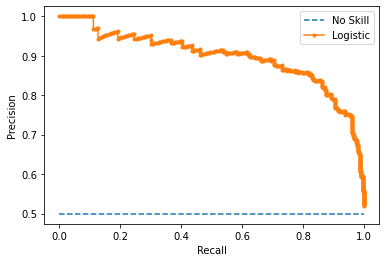

In [494]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)

# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [520]:
def plot_rocauc(X, y, models):
    
    # split into train/test sets
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y[y==1]) / len(y)

    rocauc_df = pd.DataFrame(dict(recall = [0, 1], precision = [no_skill, no_skill], legend = ["No Skill"] * 2))

    for piece in models:

        if isinstance(piece, tuple):
            model, name = piece
        
        else:
            model = piece
            name = model.__class__.__name__

        model.fit(trainX, trainy)

        # predict probabilities
        yhat = model.predict_proba(testX)

        # retrieve just the probabilities for the positive class
        pos_probs = yhat[:, 1]

        # calculate model precision-recall curve
        precision, recall, _ = precision_recall_curve(testy, pos_probs)

        model_df = pd.DataFrame(dict(recall = recall, 
                                     precision = precision, 
                                     legend = [name] * len(recall)))

        rocauc_df = pd.concat((rocauc_df, model_df))

        # return rocauc_df

    return px.line(rocauc_df, x="recall", y="precision", color="legend")

In [588]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2)

plot_rocauc(X, y, [(LogisticRegression(solver='lbfgs')), (RandomForestClassifier())])

Всё сразу
0.13016759776536313

Только f-ки
0.10738255033557047

'subject_score', 'city_score', 'population' и f-ки
0.10830527497194165

'dollar', 'bitcoin' и f-ки
0.11472742066720912

'hex_lat', 'hex_lon' и f-ки
0.11705831157528286

Минус биткоин и доллар
0.11536748329621381

In [8]:
base = 0.1073
econom = 0.0073
demography = 0.0079
best = 0.1301
diff = (best - base) / 2

In [9]:
bar_plot_df = pd.DataFrame(dict(
                  user_info     = [base, base,   base,       base], 
                  economic_stat = [0,    econom, 0,          diff], 
                  demography    = [0,    0,      demography, diff]))

In [10]:
bar_plot_df = bar_plot_df * 100

In [158]:
px.bar(bar_plot_df, range_y=[5, 13.5], text_auto=True,
        x=["Информация о клиенте", "Экономическая статистика", "Демографическая статистика", "Всё вместе"], 
        y=["user_info", "economic_stat", "demography"],
        labels={"value": "%", "x": "", 
                "user_info" : "Информация о клиенте",
                "economic_stat" : "Экономическая статистика",
                "demography" : "Демографическая статистика"},
        title="Влияние дополнительных данных на точность модели"
)

In [36]:
from scipy.interpolate import make_interp_spline

In [97]:
y = np.array([0, 2.8, 5.5, 9.3, 11.2, 13.35])
x = np.arange(1, y.shape[0] + 1, 1)

X_Y_Spline = make_interp_spline(x, y)

X = np.linspace(x.min(), x.max(), 500)
Y = X_Y_Spline(X_)

In [151]:
line_plot_df = pd.DataFrame(dict(Precision = y, Try = x))
line_plot_df["symbol"] = ""
# line_plot_df["line"] = '10'
px.line(line_plot_df, x="Try", y="Precision", symbol="symbol")

## Для сабмита

In [133]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [135]:
df_test = pd.read_csv("data/test dataset.csv", on_bad_lines='skip', delimiter=';')

In [137]:
df_test["period"] = pd.to_datetime(df_test["period"])

In [138]:
df_test["dollar"] = df_test["period"].apply(lambda x: dollar["rate"][f"{x.year} {x.month}"])

df_test["bitcoin"] = df_test["period"].apply(lambda x: bitcoin["rate"][f"{x.year} {x.month}"])

In [139]:
def get_subject_rating(subject):
    subject = subject.lower()
    if subject in rating:
        return rating[subject]

    return 0


df_test["subject_score"] = df_test["subject_name"].apply(get_subject_rating)

In [142]:
def get_city_rating(city):
    if city in city_rating.index:
        return city_rating["city_score"][city]

    return 0

def get_city_population(city):
    if city in city_rating.index:
        return city_rating["population"][city]

    return 0

df_test["city_score"] = df_test["city_name"].apply(get_city_rating)

df_test["population"] = df_test["city_name"].apply(get_city_population)

In [143]:
df_test = df_test.drop(["subject_type", "subject_name", "city_name", "hex", "period"], axis=1)

In [144]:
imp = IterativeImputer(max_iter=10)
no_none_zone_test = imp.fit_transform(df_test)

In [146]:
for i, col in enumerate(df_test):
    df_test[col] = no_none_zone_test[:, i]

In [147]:
df_test

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,...,f27,f28,f29,f30,id,dollar,bitcoin,subject_score,city_score,population
0,0.0,55.855726,37.669858,0.001150,0.00082,0.000990,0.00000,0.0,0.01028,0.000065,...,0.030013,0.062214,0.004490,0.000000,1.0,1.2426,2.092999e+06,79.275,0.674,12506.5
1,0.0,55.647024,37.609130,0.002060,0.00242,0.003400,0.00000,0.0,0.02266,0.000250,...,0.042100,0.021050,0.004910,0.000000,2.0,1.2426,2.092999e+06,79.275,0.674,12506.5
2,0.0,55.821708,37.589846,0.000820,0.00068,0.000820,0.00000,0.0,0.01098,0.000000,...,0.031950,0.003200,0.007980,0.000000,3.0,1.2426,2.092999e+06,79.275,0.674,12506.5
3,0.0,55.855726,37.669858,0.001180,0.00195,0.002580,0.00000,0.0,0.01306,0.000170,...,0.032223,0.104628,0.009050,0.000000,4.0,1.2426,2.092999e+06,79.275,0.674,12506.5
4,0.0,55.637199,37.443663,0.000790,0.00092,0.000960,0.00000,0.0,0.41867,0.000191,...,0.028173,-0.067919,0.012540,0.000000,5.0,1.2426,2.092999e+06,79.275,0.674,12506.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151786,0.0,43.352653,132.244424,0.000430,0.00051,0.000580,0.00000,0.0,0.25940,0.000000,...,0.000000,0.093750,0.052240,0.000000,151787.0,0.2014,-1.810615e+06,0.000,0.356,116.2
151787,0.0,48.466982,135.139503,0.000120,0.00013,0.000160,0.02299,0.0,0.02163,0.000471,...,0.004813,0.283236,0.000000,0.000000,151788.0,0.2014,-1.810615e+06,0.000,0.544,618.2
151788,0.0,48.506809,135.084491,0.000320,0.00032,0.000420,0.00000,0.0,0.02041,0.000125,...,0.012710,0.055910,0.030280,0.000000,151789.0,0.2014,-1.810615e+06,0.000,0.544,618.2
151789,0.0,51.369961,128.109785,0.000130,0.00013,0.000160,0.00000,0.0,0.42413,0.000070,...,0.001302,-0.127172,0.037940,0.001520,151790.0,0.2014,-1.810615e+06,38.752,0.000,0.0


In [148]:
# df_train.to_csv("data/cleaned_original+dollar+bitcoin+ratings_train_v3.csv", index=False)
df_test.to_csv("data/final_test.csv", index=False)